# Analysis on how frequent the NICD and DoH tweet

## Import Relevant Libraries

Import libraries that will be used throughout the execution. 

In [39]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import numpy as np

## Notebook Setup 

### List fields to include

We don't require all the fields included in the tweet data, for this analysis the date and time of a tweet is sufficient. 

In [40]:
use_cols = ['created_at']

### Path and File names setup

In [41]:
nicd_tweets = "sliced_nicd_sa_tweets.csv"
health_tweets = "sliced_health_za_tweets.csv"

### Load the data 

Load the tweet data and look at some simple factors about the data to understand how to proceed further. 

In [42]:
df_nicd = pd.read_csv(nicd_tweets, sep=",", usecols = use_cols, engine='python')

df_health = pd.read_csv(health_tweets, sep=",", usecols = use_cols, engine='python')


### Check the shape 

Their should be 345 tweets for NICD_SA and 607 for Health_ZA

In [43]:
df_nicd.shape

(345, 1)

In [44]:
df_health.shape

(607, 1)

### Check and convert info

Verifying that the info is datetime format:

In [45]:
df_nicd.info()

df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  345 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  607 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


Convert to DateTime Format

In [46]:
df_health.created_at = pd.to_datetime(df_health.created_at, errors='coerce')
df_nicd.created_at = pd.to_datetime(df_nicd.created_at, errors='coerce')

Verify that data is in correct format:

In [47]:
df_nicd.info()

df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   created_at  345 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   created_at  607 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 4.9 KB


In [48]:
df_nicd.head(5)

,created_at
0,2020-03-19 16:41:07+00:00
1,2020-03-19 13:17:53+00:00
2,2020-03-19 09:40:49+00:00
3,2020-03-19 09:40:48+00:00
4,2020-03-19 09:40:48+00:00


In [49]:
df_health.head(5)

,created_at
0,2020-03-19 20:59:19+00:00
1,2020-03-19 20:58:53+00:00
2,2020-03-19 19:45:29+00:00
3,2020-03-19 18:57:11+00:00
4,2020-03-19 17:52:58+00:00


## Create Histogram 

The following histogram shows the number of tweets the NICD and DoH have tweeted from the roughly the start of concern in South Africa. 

### Function to create graph:

In [50]:
def view_full_timeline_of_tweets(df, column, prefix="# Tweets", size=(25,8), kind="bar", fontsize=20):
    
    df[column].groupby(df[column].dt.date).count().plot(kind=kind, 
                                                         figsize=size,
                                                         fontsize=fontsize,
                                                         title=prefix)
    plt.show()
    

### Creating the graph for each twitter account:

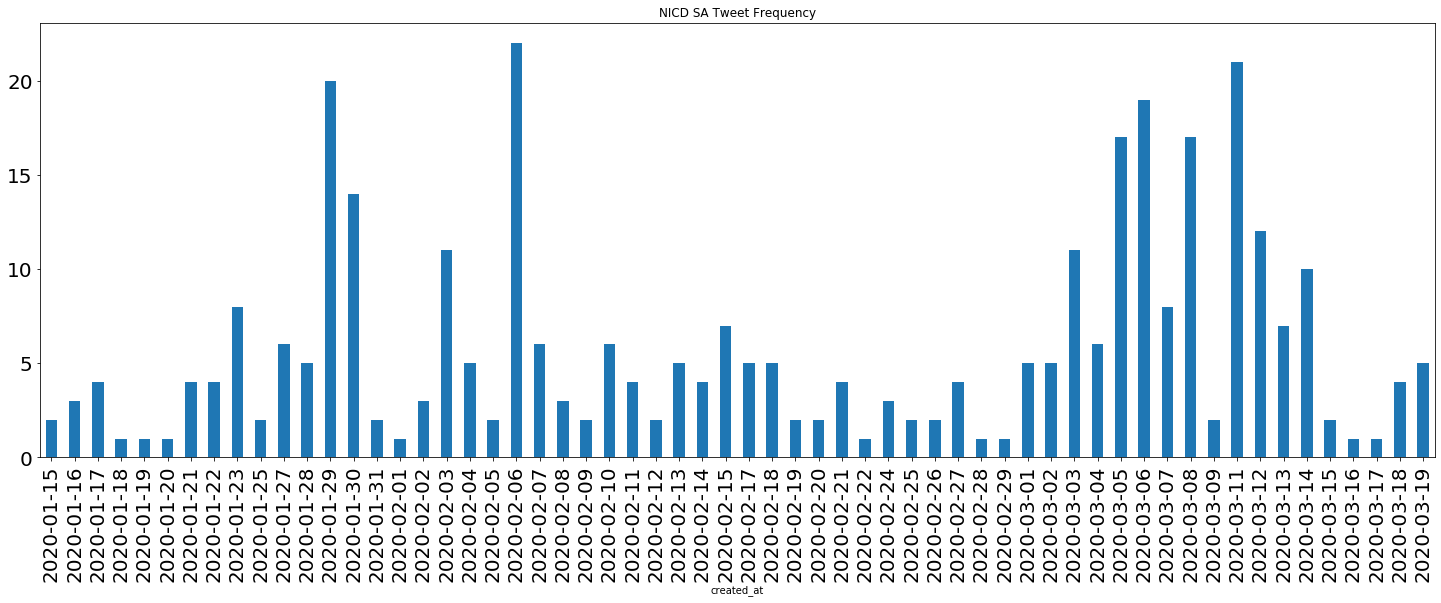

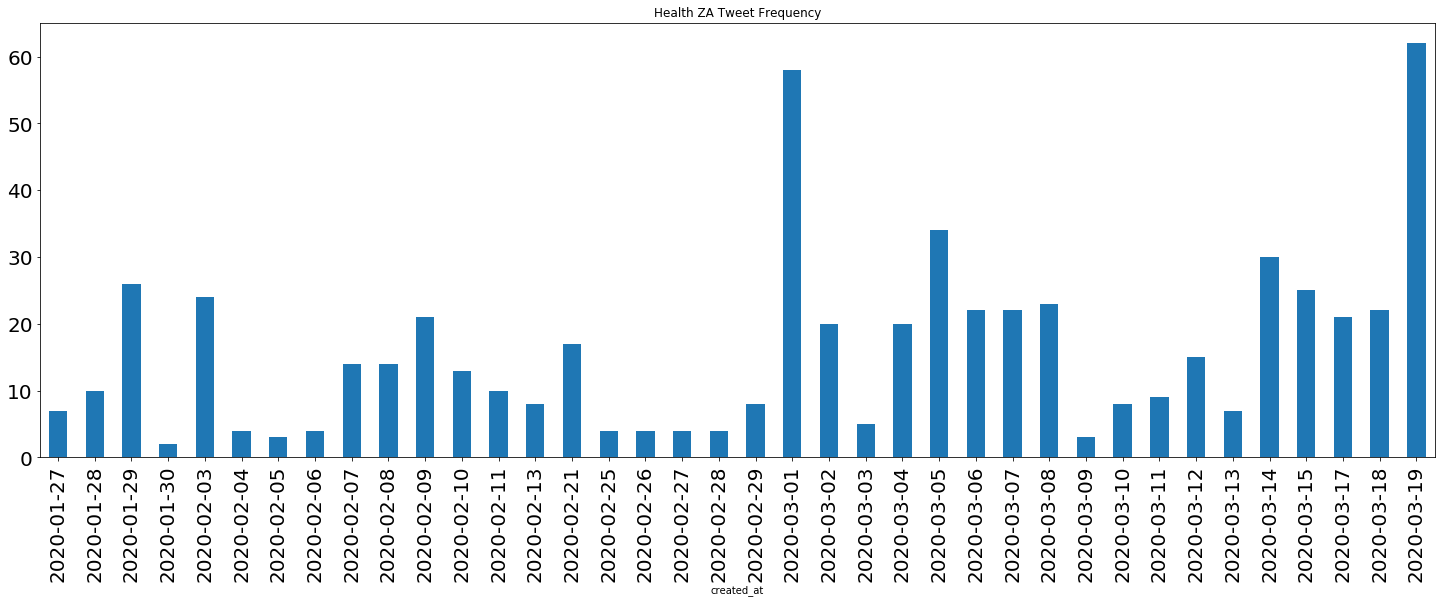

In [53]:
view_full_timeline_of_tweets(df_nicd, "created_at", prefix="NICD SA Tweet Frequency")

view_full_timeline_of_tweets(df_health, "created_at", prefix="Health ZA Tweet Frequency")

## Analysis of Resulting Graphs

### NICD SA 

- Comparing the two graphs it is clear to see that the NICD were first to start covering the COVID-19 pandemic with a twelve day headstart. It is an expected outcome, since the NICD's main focus is on communicable diseases. 

- The NICD's two highest peaks occured on the 6th of Feb and 11th of March, suprisingly majority of these tweets were replies to questions posed by the twitter community. Each question got a unique response from the NICD.

### Health ZA

- The Health_ZA tweeted the most on the 19th of March and 01st of March. On the 19th, the tweets were mainly retweets from the NHI and DR Zweli Mkhize (Minister of Health). These retweets were around the  current progress of the coronavirus in SA. On the 01st, the tweets were again mainly retweets from Dr Zweli Mkhize, however, the retweets were around the progress of the virus in other countries and notably reporting on the tests done in SA have come out negative. 